# übersicht im wirrwarr
- [interactive plots](#interactive-plots)

# interactive plots

In [1]:
# importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd

import folium
from owslib.wms import WebMapService

import ipywidgets as widgets
from IPython.display import display

import numpy as np
import plotly.express as px


In [2]:
#all data

df = pd.read_csv("./data/energiebilanz/E5_Bruttostromerzeugung_allgemeine_1955_2021.txt")
df = df.replace('.', None)

df2 = pd.read_csv("./data/testkraftwerk/watt.csv")


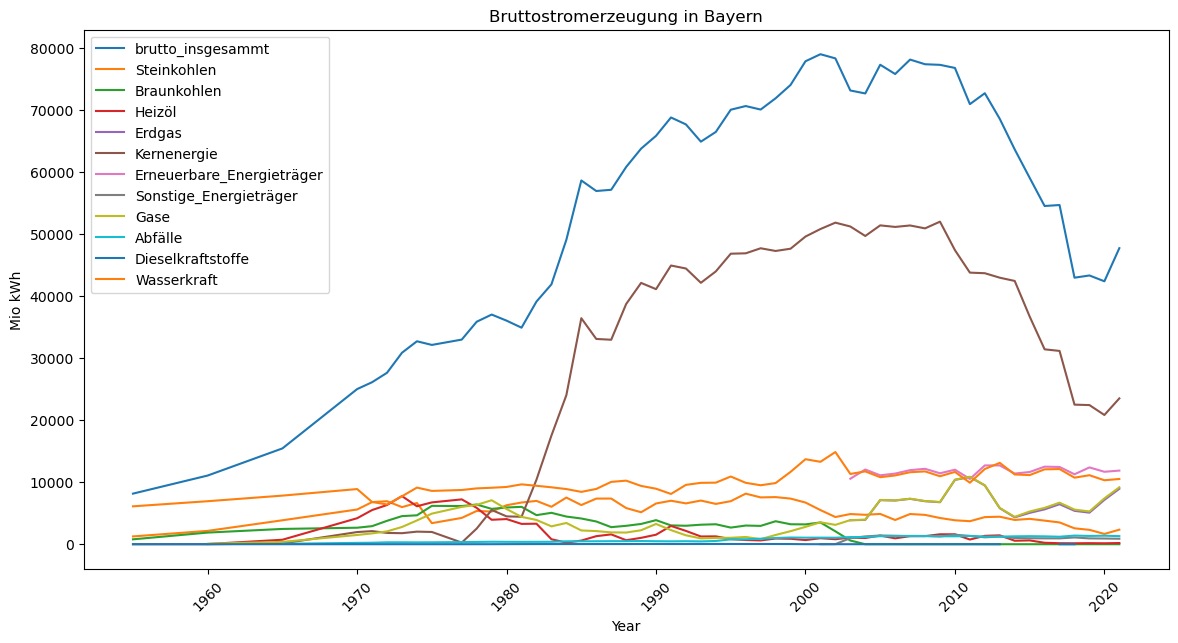

In [3]:
#plot testing
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
plt.figure(figsize=(14,7))
for i in range(1, df.shape[1]):
    plt.plot(df['Year'], df[df.columns[i]], label=df.columns[i])
plt.xlabel('Year')
plt.ylabel('Mio kWh')
plt.title('Bruttostromerzeugung in Bayern')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [4]:
#slider testing
def my_function(number_1, number_2, my_string, someint):
    result = number_1 * number_2
    print(f'{my_string}: {result} : {someint}')

widgets.interact(my_function, 
    number_1=widgets.IntSlider(min=1, max=100, step=1, value=10), 
    number_2=widgets.FloatSlider(min=1, max=10.0, step=0.5, value=5.0), 
    my_string=widgets.Text(value='Product'),
    someint=widgets.FloatText(value=10, description='Number: ', disabled=False, continuous_update=True)
)


interactive(children=(IntSlider(value=10, description='number_1', min=1), FloatSlider(value=5.0, description='…

<function __main__.my_function(number_1, number_2, my_string, someint)>

In [5]:
def plot_data(start_year, end_year):
    plt.figure(figsize=(14,7))

    filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

    for i in range(1, filtered_df.shape[1]):
        plt.plot(filtered_df['Year'], filtered_df[filtered_df.columns[i]], label=filtered_df.columns[i])

    plt.xlabel('Year')
    plt.ylabel('Mio kWh')
    plt.title('Energy Source Usage Over Time')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

start_year_slider = widgets.IntSlider(min=df['Year'].min(), max=df['Year'].max(), step=1, description='Start Year:', continuous_update=False)
end_year_slider = widgets.IntSlider(min=df['Year'].min(), max=df['Year'].max(), step=1, description='End Year:', continuous_update=False)

widgets.interact(plot_data, start_year=start_year_slider, end_year=end_year_slider)


interactive(children=(IntSlider(value=1955, continuous_update=False, description='Start Year:', max=2021, min=…

<function __main__.plot_data(start_year, end_year)>

In [6]:
year_range_slider = widgets.IntRangeSlider(
    value=[df['Year'].min(), df['Year'].max()],
    min=df['Year'].min(),
    max=df['Year'].max(),
    step=1,
    description='Year Range:',
    continuous_update=False
)
def plot_data(year_range):
    plt.figure(figsize=(14,7))

    filtered_df = df[(df['Year'] >= year_range[0]) & (df['Year'] <= year_range[1])]

    for i in range(1, filtered_df.shape[1]):
        plt.plot(filtered_df['Year'], filtered_df[filtered_df.columns[i]], label=filtered_df.columns[i])

    plt.xlabel('Year')
    plt.ylabel('Mio kWh')
    plt.title('Energy Source Usage Over Time')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.show()
widgets.interact(plot_data, year_range=year_range_slider)


interactive(children=(IntRangeSlider(value=(1955, 2021), continuous_update=False, description='Year Range:', m…

<function __main__.plot_data(year_range)>

<Figure size 1400x700 with 0 Axes>

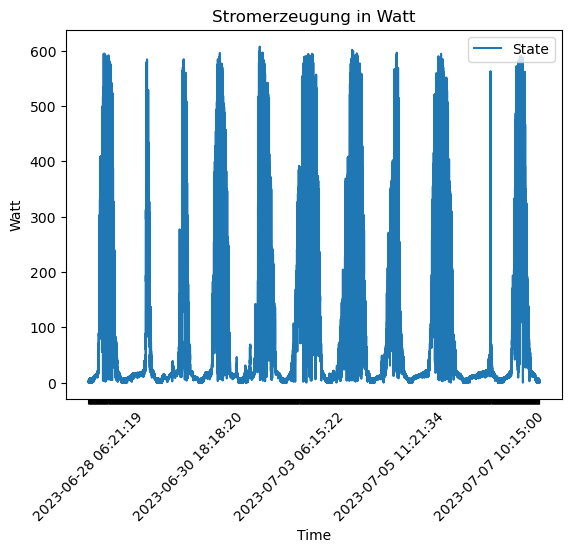

In [124]:
#plot testing
#df = df.replace('.', None)
plt.figure(figsize=(14,7))
df2.plot(x='Timestamp', y='State')
plt.xlabel('Time')
plt.ylabel('Watt')
plt.title('Stromerzeugung in Watt')
plt.xticks(rotation=45)
# xticks step
plt.xticks(np.arange(0, len(df2['Timestamp']), 100))
plt.show()

In [8]:
def create_map(wms_url, layer_name, select_lat, select_lon, header):
    #wms = WebMapService('https://www.lfu.bayern.de/gdi/wms/energieatlas/statistik_photovoltaik?REQUEST=GetCapabilities&SERVICE=WMS')

    germany_location = [48.99, 11.240785]
    select_location = [select_lat, select_lon]
    m = folium.Map(germany_location, zoom_start=8, dragging=False, zoom_control=False, scrollWheelZoom=False, doubleClickZoom=False, touchZoom=False, width='80%')
        
    folium.WmsTileLayer(
        url=wms_url,
        layers=layer_name,
        name=layer_name,
        fmt='image/png',
        transparent=True
    ).add_to(m)

    movemarker = folium.Marker(select_location, tooltip=None, popup=None, draggable=False)
    m.add_child(movemarker)

    folium.LatLngPopup().add_to(m)
    
    display(header, m)

In [ ]:
def interact_pv_gem(select_lat, select_lon, month, panel_watt, panel_count, wechselrichter_watt, price_balkonkraftwerk, price_kwh, verbrauch_kwh_pro_jahr):
    #map für den Gesammtverbrauch einer Gemeinde
    wms_verbrauch=WebMapService('https://www.lfu.bayern.de/gdi/wms/energieatlas/statistik_photovoltaik?REQUEST=GetCapabilities&SERVICE=WMS').url
    create_map(wms_url=wms_verbrauch, layer_name='anteil_pv_gem', select_lat=select_lat, select_lon=select_lon, 
        header="Diese Karte zeigt den Anteil des Gesamtverbrauchs einer Gemeinde, der durch erneuerbare Energien (z.B. Photovoltaic) gedeckt wird. Der Anteil wird in Prozent angegeben.")
    
    #map für die Globalstrahlung
    wms_globalstrahlung=WebMapService('https://wirtschaft-risby.bayern.de/RisGate/servlet/Globalstrahlung').url
    def month_from_number(int):
        months = ['januar', 'februar', 'maerz', 'april', 'mai', 'juni', 'juli', 'august', 'september', 'oktober', 'november', 'dezember', 'jahr']
        return months[int-1]
    strahlung_zeit = 'Globalstrahlung_' + month_from_number(month)
    create_map(wms_url=wms_globalstrahlung, layer_name=strahlung_zeit, select_lat=select_lat, select_lon=select_lon,
        header="Diese Karte zeigt die Globalstrahlung in Bayern. Die Globalstrahlung ist die Summe aus direkter und diffuser Strahlung. Die Globalstrahlung wird in kWh/m² angegeben.")
    
print("Hier können auch andere Werte eingegeben werden. Die Werte werden dann in der Karte angezeigt.")

widgets.interact(interact_pv_gem,
    select_lat=widgets.Text(value='48.15451802076226', description='Longitude:', disabled=False, continuous_update=False, style={'description_width': 'initial'}, layout=widgets.Layout(width='fit-content')),
    select_lon=widgets.Text(value='11.556412766827073', description='Latitude: ', disabled=False, continuous_update=False, style={'description_width': 'initial'}, layout=widgets.Layout(width='fit-content')),
    month=widgets.IntSlider(min=1, max=13, step=1, value=1, description='Month (13 for whole year):', continuous_update=False, style={'description_width': 'initial'}, layout=widgets.Layout(width='40%')),
    panel_watt=widgets.IntText(value=300, description='Watt per Panel:', disabled=False, continuous_update=False, style={'description_width': 'initial'}, layout=widgets.Layout(width='fit-content')),
    panel_count=widgets.IntText(value=1, description='Panel Count:', disabled=False, continuous_update=False, style={'description_width': 'initial'}, layout=widgets.Layout(width='fit-content')),
    wechselrichter_watt=widgets.IntText(value=600, description='Wechselrichter:', disabled=False, continuous_update=False, style={'description_width': 'initial'}, layout=widgets.Layout(width='fit-content')),
    price_balkonkraftwerk=widgets.IntText(value=1070, description='Balkonkraftwerk Price:', disabled=False, continuous_update=False, style={'description_width': 'initial'}, layout=widgets.Layout(width='fit-content')),
    price_kwh=widgets.FloatText(value=0.3, description='Price per kWh in €:', disabled=False, continuous_update=False, style={'description_width': 'initial'}, layout=widgets.Layout(width='fit-content')),
    verbrauch_kwh_pro_jahr=widgets.IntText(value=3000, description='Verbrauch kWh pro Jahr:', disabled=False, continuous_update=False, style={'description_width': 'initial'}, layout=widgets.Layout(width='fit-content'))
)

Hier können auch andere Werte eingegeben werden. Die Werte werden dann in der Karte angezeigt.


interactive(children=(Text(value='48.15451802076226', continuous_update=False, description='Longitude:', layou…

<function __main__.interact_pv_gem(select_lat, select_lon, month, panel_watt, panel_count, wechselrichter_watt, price_balkonkraftwerk, price_kwh, verbrauch_kwh_pro_jahr)>

In [10]:
for layer in WebMapService('https://wirtschaft-risby.bayern.de/RisGate/servlet/Globalstrahlung').contents:
	print(layer)

globalstrahlung_dezember
globalstrahlung_november
globalstrahlung_oktober
globalstrahlung_september
globalstrahlung_august
globalstrahlung_juli
globalstrahlung_juni
globalstrahlung_mai
globalstrahlung_april
globalstrahlung_maerz
globalstrahlung_februar
globalstrahlung_januar
globalstrahlung_jahr


In [11]:
# import requests

# # Define the parameters for the GetFeatureInfo request
# base_url = "https://wirtschaft-risby.bayern.de/RisGate/servlet/Globalstrahlung"
# wms_layer = "globalstrahlung_januar"
# format = "image/png"
# width = 1000000
# height = 1000000
# x = 0
# y = 0
# bbox = "<minx>,<miny>,<maxx>,<maxy>"
# srs = "EPSG:4326"
# info_format = "text/xml"

# # Construct the GetFeatureInfo request URL
# get_feature_info_url = f"{base_url}?service=WMS&version=1.1.1&request=GetFeatureInfo&layers={wms_layer}&query_layers={wms_layer}&format={format}&width={width}&height={height}&x={x}&y={y}&bbox={bbox}&srs={srs}&info_format={info_format}"

# # Make the GetFeatureInfo request
# response = requests.get(get_feature_info_url)

# # Check the response status code
# if response.status_code == 200:
#     # Process the response data according to your needs
#     data = response.text
#     print(data)
# else:
#     print(f"Error: {response.status_code} - {response.reason}")

In [93]:
def get_data_from_wms(url, layer_name, lat, lon):
    from pyproj import Transformer
    target_crs = 'EPSG:4326'
    source_crs = 'EPSG:4326'
    transformer = Transformer.from_crs(source_crs, target_crs)
    lon, lat = transformer.transform(lon, lat)

    minx = lon -0.00001
    maxx = lon +0.00001
    miny = lat -0.00001
    maxy = lat +0.00001
    width = 1
    height = 1
    x = width / 2
    y = height / 2
    
    wms = WebMapService(url)
    response = wms.getfeatureinfo(
        layers=[layer_name],
        format='application/json',
        bbox=(minx, miny, maxx, maxy),
        size=(width, height),
        srs='EPSG:4326',
        query_layers=[layer_name],
        xy=(x, y),
        info_format='application/json'
    )

    data = response.read()
    return data

testdata = get_data_from_wms('https://wirtschaft-risby.bayern.de/RisGate/servlet/Globalstrahlung', 'globalstrahlung_januar', 48.1537, 11.5406)
print(str(str(testdata)[2:-1]).replace(r'\n', '\n').replace(r'\r', '\r'))

<?xml version="1.0" encoding="UTF-8"?>

<FeatureInfoResponse xmlns:esri_wms="http://www.esri.com/wms" xmlns="http://www.esri.com/wms">
<FIELDS OBJECTID="276" Shape="Polygon" radiation_class="32 - 35" Monatsmittelwert="32 - 35 kWh/m\xc2\xb2" Shape_Length="859652,136107" Shape_Area="9328438687,167662"></FIELDS>
</FeatureInfoResponse>



In [123]:
def parse_xml(data, dataname):
	import xml.etree.ElementTree as ET
	root = ET.fromstring(data)
	fields_element = root.find('.//{http://www.esri.com/wms}FIELDS')
	rdata = fields_element.get(dataname)
	return rdata

parse_xml(get_data_from_wms('https://wirtschaft-risby.bayern.de/RisGate/servlet/Globalstrahlung', 'globalstrahlung_januar', 48.1537, 11.5406), 'radiation_class')

'32 - 35'

In [ ]:
def get_data_from_wms_parse_xml(url, layer_name, lat, lon, dataname):
    #hier wird ein möglichst kleiner Bereich um den Marker herum abgefragt
    multiplier = 1
    rdata = None
    
    while rdata == None:
        multiplier_small = multiplier / 1000 
        
        minx = lon -multiplier_small
        maxx = lon +multiplier_small
        miny = lat -multiplier_small
        maxy = lat +multiplier_small
        
        width = multiplier
        height = multiplier
        x = width / 2
        y = height / 2
        
        wms = WebMapService(url)
        response = wms.getfeatureinfo(
            layers=[layer_name],
            format='application/json',
            bbox=(minx, miny, maxx, maxy),
            size=(width, height),
            srs='EPSG:4326',
            query_layers=[layer_name],
            xy=(x, y),
            info_format='application/json'
        )
        data = response.read()
        
        root = ET.fromstring(data)
        fields_element = root.find('.//{http://www.esri.com/wms}FIELDS')
        rdata = fields_element.get(dataname)
        multiplier = multiplier * 10
    return rdata

In [129]:
data = '168 - 171 kWh/m²'
data2 = '168 - 171'


def getDataMean(data):
    return [int(s) for s in data.split() if s.isdigit()]


print(getDataMean(data))
print(getDataMean(data2))

[168, 171]
[168, 171]


In [134]:
for i in range(13):
	print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13


In [135]:
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
sum(days_in_month)

365

In [136]:
365/31

11.774193548387096